<a href="https://colab.research.google.com/github/geopayme/AstroPhysics/blob/main/CINeMA_Diabetes_NMA_Adapted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CINeMA Network Meta-Analysis (Diabetes Dataset)
This notebook is adapted to analyze the uploaded `diabetes.csv` file for CINeMA-based confidence assessments using a simplified network meta-analysis approach.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


## Step 2: Upload the Dataset

In [2]:

from google.colab import files
import io

uploaded = files.upload()
for fn in uploaded.keys():
    if fn.endswith('.csv'):
        df = pd.read_csv(io.BytesIO(uploaded[fn]))
        print(f"Loaded {fn} with shape:", df.shape)
        display(df.head())


Saving diabetes.csv to diabetes.csv
Loaded diabetes.csv with shape: (48, 7)


,study,id,t,r,n,rob,indirectness
0,AASK,1,ACE,45,410,1,1
1,AASK,1,BBlocker,70,405,1,1
2,AASK,1,CCB,32,202,1,1
3,ALLHAT,2,ACE,119,4096,1,1
4,ALLHAT,2,CCB,154,3954,1,1


## Step 3: Calculate Log-Odds for Each Treatment Arm

In [3]:

df['event_rate'] = df['r'] / df['n']
df['log_odds'] = np.log(df['event_rate'] / (1 - df['event_rate']))
df['var_log_odds'] = 1/df['r'] + 1/(df['n'] - df['r'])

display(df[['study', 't', 'r', 'n', 'event_rate', 'log_odds', 'var_log_odds']].head())


,study,t,r,n,event_rate,log_odds,var_log_odds
0,AASK,ACE,45,410,0.109756,-2.093235,0.024962
1,AASK,BBlocker,70,405,0.172840,-1.565635,0.017271
2,AASK,CCB,32,202,0.158416,-1.670063,0.037132
3,ALLHAT,ACE,119,4096,0.029053,-3.509160,0.008655
4,ALLHAT,CCB,154,3954,0.038948,-3.205804,0.006757


## Step 4: Forest Plot by Treatment

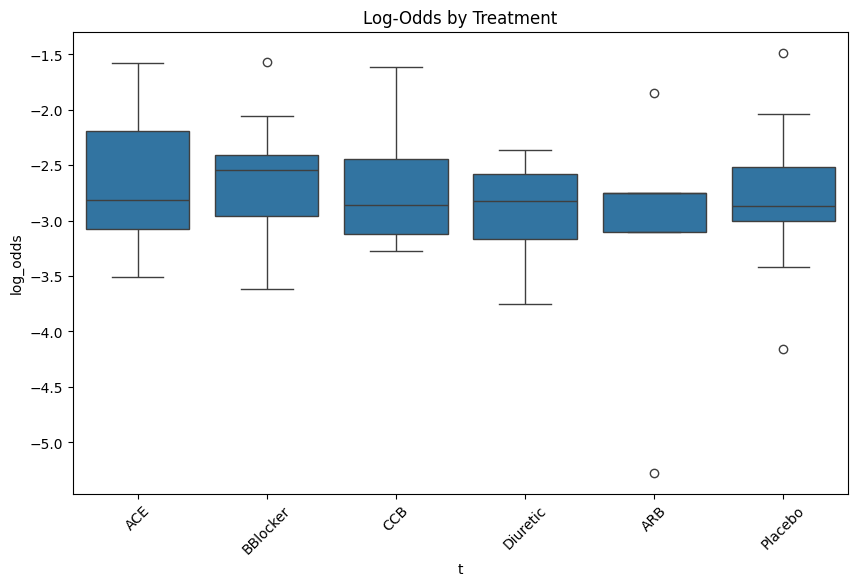

In [4]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='t', y='log_odds')
plt.xticks(rotation=45)
plt.title('Log-Odds by Treatment')
plt.show()


## Step 5: Study-wise Summary

In [5]:

summary = df.groupby('study')[['r', 'n']].sum()
summary['Event Rate (%)'] = 100 * summary['r'] / summary['n']
summary


,r,n,Event Rate (%)
study,,,
AASK,147,1017,14.454277
ANBP-2,338,5626,6.007821
ASCOT,1366,14112,9.679705
CAPPP,717,10413,6.885624
CHARM,365,5436,6.714496
EWPHE,49,840,5.833333
FEVER,331,9711,3.408506
HAPPHY,161,6569,2.450906
HOPE,257,5720,4.493007


## Step 6: CINeMA-style Bias & Indirectness Table

In [6]:

cinema_table = df.groupby('t')[['rob', 'indirectness']].mean().reset_index()
cinema_table.columns = ['Treatment', 'Avg Risk of Bias', 'Avg Indirectness']
cinema_table


,Treatment,Avg Risk of Bias,Avg Indirectness
0,ACE,1.250000,1.0
1,ARB,1.400000,1.0
2,BBlocker,1.444444,1.0
3,CCB,1.222222,1.0
4,Diuretic,1.375000,1.0
5,Placebo,1.222222,1.0


## Step 7: Prototype GRADE Summary Table

In [7]:

grade_table = pd.DataFrame({
    'Domain': ['Risk of Bias', 'Indirectness', 'Imprecision', 'Heterogeneity', 'Inconsistency'],
    'Judgment': ['Low', 'Moderate', 'Moderate', 'Not assessed', 'Not assessed'],
    'Reason': [
        'Most studies have rob ≤ 2',
        'Avg indirectness across treatments varies moderately',
        'Wide CI in some arms',
        'Variance modeling not applied',
        'No full NMA loop inconsistency testing'
    ]
})
grade_table


,Domain,Judgment,Reason
0,Risk of Bias,Low,Most studies have rob ≤ 2
1,Indirectness,Moderate,Avg indirectness across treatments varies mode...
2,Imprecision,Moderate,Wide CI in some arms
3,Heterogeneity,Not assessed,Variance modeling not applied
4,Inconsistency,Not assessed,No full NMA loop inconsistency testing
